In [1]:
import pandas as pd

In [151]:
meta_data = 'meta_data.json'
df = pd.read_json(meta_data)

In [152]:
# Systematicapping Studiy Correlations
df

,database,url,title,authors,journal,citations,publish_date,keywords,doi,journal_impact_factor
0,sciencedirect,https://www.sciencedirect.com/science/article/...,An evaluation framework for network security v...,"[{'surname': 'Sharafaldin', 'first_name': 'Ima...",Computers & Security,1,2019,"[Information visualization, Network attacks, E...",https://doi.org/10.1016/j.cose.2019.03.005,3.062
1,sciencedirect,https://www.sciencedirect.com/science/article/...,Government regulations in cyber security: Fram...,"[{'surname': 'Srinivas', 'first_name': 'Jangir...",Future Generation Computer Systems,2,2019,"[Cyber security, Cyber attacks, Information se...",https://doi.org/10.1016/j.future.2018.09.063,5.768
2,sciencedirect,https://www.sciencedirect.com/science/article/...,The least secure places in the universe? A sys...,"[{'surname': 'Bongiovanni', 'first_name': 'Iva...",Computers & Security,13,2019,"[Information security management, Cybersecurit...",https://doi.org/10.1016/j.cose.2019.07.003,3.062
3,ieeexplore,https://ieeexplore.ieee.org/document/6568374,A Cyber Attack Modeling and Impact Assessment ...,"[Igor Kotenko ;, Andrey Chechulin]",2013 5th International Conference on Cyber Con...,3,2013,"[Security, Computational modeling, Measurement...",None,NaN
4,sciencedirect,https://www.sciencedirect.com/science/article/...,A comprehensive instrument for identifying cri...,"[{'surname': 'Herrera', 'first_name': 'Luis-Ca...",International Journal of Critical Infrastructu...,14,2019,"[Critical Information Infrastructure, Critical...",https://doi.org/10.1016/j.ijcip.2019.02.001,2.225
5,ieeexplore,https://ieeexplore.ieee.org/document/8626831,A Conceptual Framework of IT Security Governan...,[Nadianatra Musa],2018 Cyber Resilience Conference (CRC),110,2018,"[Security, Monitoring, Interviews, Companies, ...",10.1109/CR.2018.8626831,NaN
6,ieeexplore,https://ieeexplore.ieee.org/document/6984212/,The Impact of Cyber Security Issues on Busines...,"[Hajar Iguer ;, Hicham Medromi ;, Adil Sayouti...",2014 International Conference on Future Intern...,5,2014,"[Computer security, Information security, Mult...",10.1109/FiCloud.2014.56,NaN
7,ieeexplore,https://ieeexplore.ieee.org/document/6717070,Threat analysis in the software development li...,"[J. Whitmore ;, S. Türpe ;, S. Triller ;, A. P...",IBM Journal of Research and Development,2,2014,"[Software development, Computer security, Busi...",10.1147/JRD.2013.2288060,0.790
8,sciencedirect,https://www.sciencedirect.com/science/article/...,A survey on technical threat intelligence in t...,"[{'surname': 'Tounsi', 'first_name': 'Wiem'}, ...",Computers & Security,19,2018,"[Technical threat intelligence, Indicators of ...",https://doi.org/10.1016/j.cose.2017.09.001,3.062
9,ieeexplore,https://ieeexplore.ieee.org/document/8470942/,"Survey of Attack Projection, Prediction, and F...","[Martin Husák ;, Jana Komárková ;, Elias Bou-H...",IEEE Communications Surveys & Tutorials,1,2018,"[Task analysis, Forecasting, Cyberattack, Comm...",10.1109/COMST.2018.2871866,22.973


In [153]:
# Optimizes the dataframe, categorys for the papers
df["database"] = df["database"].astype("category")

# Correction of row 18 from April to 2017
df.at[18, "publish_date"] = 2017
# Setting publish_date to integer values
df["publish_date"] = df["publish_date"].astype("int")

# Extracting irrelevant columns
# Such as url and doi
df = df.drop(["url", "doi"], axis=1)

# Replacing list of dicts in authors column for sciencedirect papers with list of authors names
scidir_mask = df["database"] == 'sciencedirect'
f = lambda x: [f"{y['first_name']} {y['surname']}" for y in x]
df.loc[scidir_mask, 'authors'] = df.loc[scidir_mask, 'authors'].apply(f)


In [148]:
# How many items should be displayed in set_option
pd.set_option('display.max_colwidth', 50)

In [154]:
df.head()

,database,title,authors,journal,citations,publish_date,keywords,journal_impact_factor
0,sciencedirect,An evaluation framework for network security v...,"[Iman Sharafaldin, Arash Habibi Lashkari, Ali ...",Computers & Security,1,2019,"[Information visualization, Network attacks, E...",3.062
1,sciencedirect,Government regulations in cyber security: Fram...,"[Jangirala Srinivas, Ashok Kumar Das, Neeraj K...",Future Generation Computer Systems,2,2019,"[Cyber security, Cyber attacks, Information se...",5.768
2,sciencedirect,The least secure places in the universe? A sys...,[Ivano Bongiovanni],Computers & Security,13,2019,"[Information security management, Cybersecurit...",3.062
3,ieeexplore,A Cyber Attack Modeling and Impact Assessment ...,"[Igor Kotenko ;, Andrey Chechulin]",2013 5th International Conference on Cyber Con...,3,2013,"[Security, Computational modeling, Measurement...",NaN
4,sciencedirect,A comprehensive instrument for identifying cri...,"[Luis-Carlos Herrera, Olaf Maennel]",International Journal of Critical Infrastructu...,14,2019,"[Critical Information Infrastructure, Critical...",2.225


In [161]:
# Number of studies per database

In [156]:
# Number of studies per author

In [157]:
# Time series correlation. x: time in years y: number of studies

In [158]:
# Venue types. Journals or Conference

In [ ]:
# Venue types matched. Most published journals

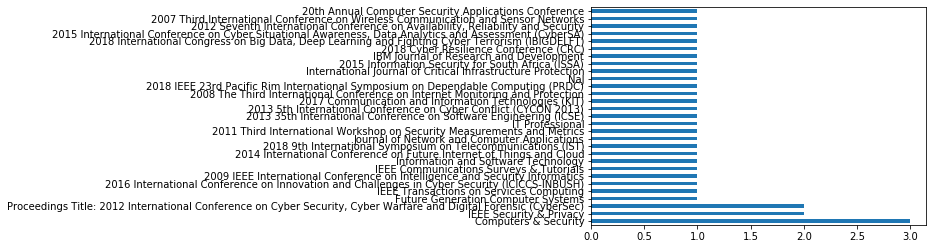

In [175]:
# Most published journals
pub_journals = df["journal"].value_counts()
pub_journals.plot(kind='barh')

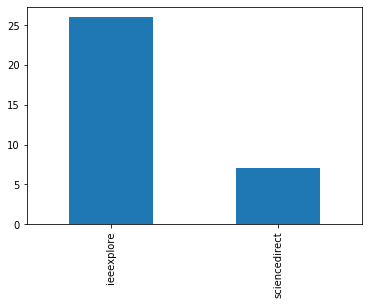

In [171]:
# Found papers in databases
used_databases = df["database"].value_counts()
used_databases.plot(kind='bar')

In [108]:
# Extract only sciencedirect papers
scidir_mask = df["database"] == 'sciencedirect'
authors_col = df["authors"] is not None
only_scidir = df[authors_col & scidir_mask]

def science_direct_sorting_names(authors_column):
    authors_list = []
    for name_lists in authors_column:
        for dictionary in name_lists:
            name_as_list = [*dictionary.values()][::-1]
            author = ' '.join(name_as_list)
            authors_list.append(author)
    return authors_list


only_scidir["authors"]
# Get each cell
for cell in df["authors"]:
    if df["authors"] is not None and df["database"] == 'sciencedirect':
        # get each list from cell
        cell_list = []
        for dictionary in cell:
            # get the values from dict and reverse into list
            name_as_list = [*dictionary.values()][::-1]
            # make list from first and surname a string
            author = ' '.join(name_as_list)
            cell_list.append(author)
        
print(authors_list)

['Iman Sharafaldin', 'Arash Habibi Lashkari', 'Ali A. Ghorbani', 'Jangirala Srinivas', 'Ashok Kumar Das', 'Neeraj Kumar', 'Ivano Bongiovanni', 'Luis-Carlos Herrera', 'Olaf Maennel', 'Wiem Tounsi', 'Helmi Rais', 'Patrick Morrison', 'David Moye', 'Rahul Pandita', 'Laurie Williams', 'Mengmeng Ge', 'Jin B. Hong', 'Walter Guttmann', 'Dong Seong Kim']
